## Estimating model parameters

by *Suwichaya Suwanwimolkul, Ph.D.*

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/GenAI-CUEE/Estimation-Theory-EE523/blob/master/Tutorial3part2/main.ipynb)

Why you may want to estimate the model parameters? 

### Denoising

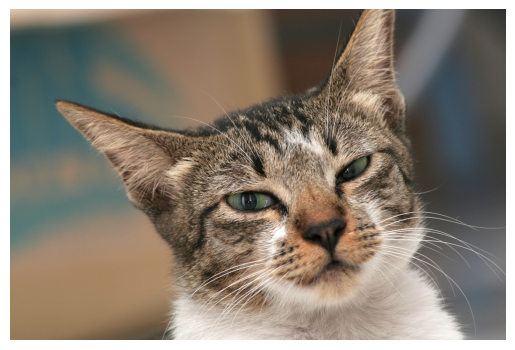

In [1]:
import matplotlib.pyplot as plt 
from PIL import Image
import numpy as np  

# Read image
img = Image.open('original.jpg')
img = np.asarray(img)
img = img/255 
plt.imshow(img)
plt.axis("off")
plt.show()  


Let $X$ be the cat image, and $n$ is the Gaussian noise with zero mean, $\mathcal{N}(0, \sigma^2)$. 

In this situation, you have the noise added to your original images:
$$ Y = X + n $$

... Then, $Y$ is the noise added images, which is another Gaussian with mean equal to $X$ and variance similar to the variance of the noise. 

$$ Y \sim \mathcal{N}(X, \sigma^2) $$

The noise added cat image is shown below ....

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


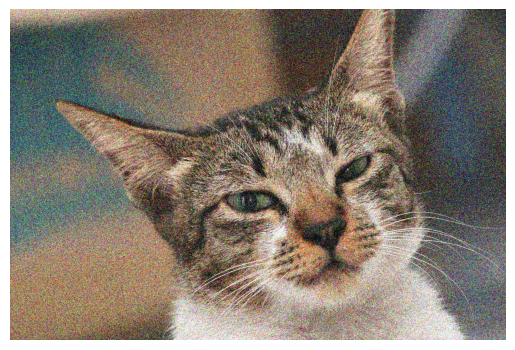

In [2]:
(row, col, ch) = img.shape 

sigma = 0.2
mean  = 0 
count = 0

noise_added_catimage_list = []
for i in range(100):
    count = count + 1 
    gauss_noise = np.random.normal(mean, sigma, (row,col,ch))
    noise_added_catimage = gauss_noise + img 
    noise_added_catimage_list.append(noise_added_catimage)
    if i <= 4:
        plt.imsave("noisy-%d-cat.jpg" % count, noise_added_catimage*(noise_added_catimage > 0)*(noise_added_catimage < 1) )
plt.imshow(noise_added_catimage)
plt.axis("off")
plt.show() 


To estimate $X$ from $Y \sim \mathcal{N}(X, \sigma^2)$, we may employ the sample mean technique:

$$\hat{X} = \frac{1}{n} \sum_{i = 1}^n {Y_i}$$

Then... let's try this sample mean technique .... 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


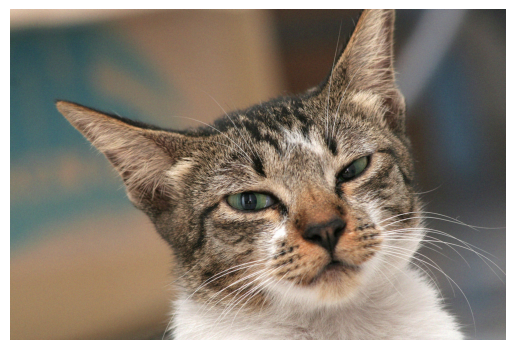

In [3]:
denoised_added_catimage = np.mean(np.stack(noise_added_catimage_list, axis=3),axis=3)

plt.imsave("denoised-cat.jpg", denoised_added_catimage*(denoised_added_catimage > 0)*(denoised_added_catimage < 1)) 
plt.imshow(denoised_added_catimage) 
plt.axis("off")
plt.show() 

## Fitting Distribution

You can use `stats.fit` to estimate the model parameters of a random variable $X$ ... 
1. At first, you have to inspect the histogram of the data ...

In [4]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('dataset.csv')

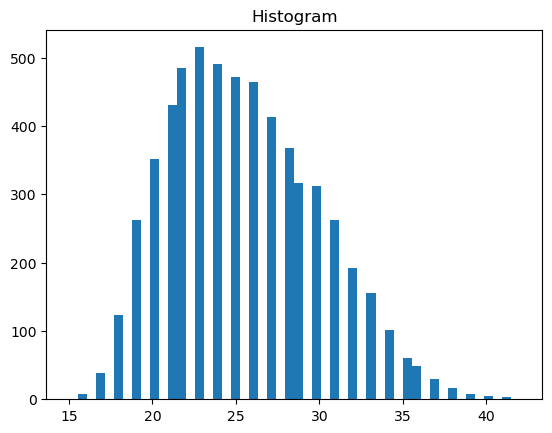

In [5]:
data = df["Age"].values  
plt.hist(data, bins=50)
plt.title("Histogram")
plt.show()

2. To use `stats.fit`, you have to choose a disitribution. 

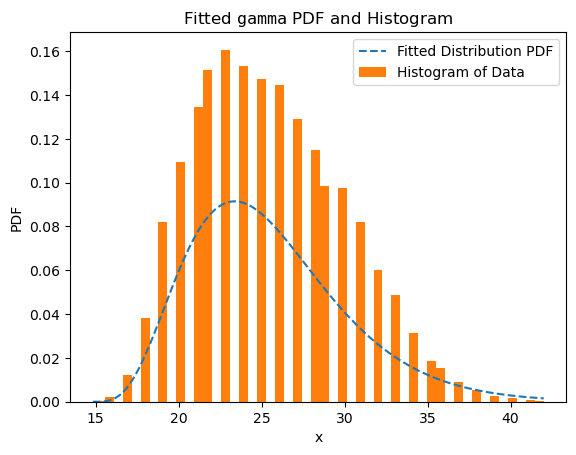

In [6]:
from scipy import stats
dist = stats.gamma 
bounds = [(0, 5), (0,100), (0,100)]
res = stats.fit(dist, data, bounds)
res.plot() 
plt.show()

/home/gaap/anaconda3/lib/python3.12/site-packages/scipy/stats/_distn_infrastructure.py:2362: RuntimeWarning: overflow encountered in divide
  x = (x - loc) / scale


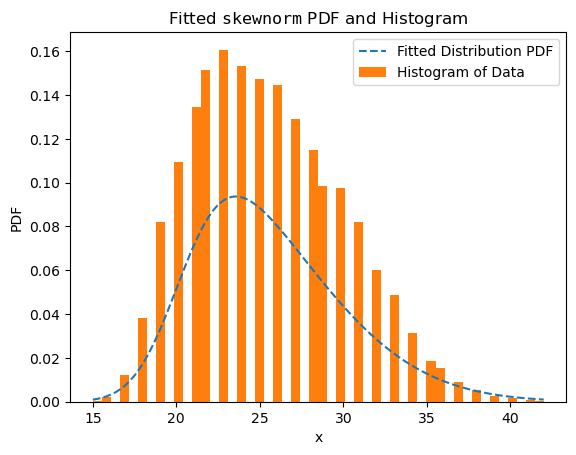

In [7]:
dist = stats.gamma 
dist = stats.skewnorm 
bounds = [(0, 100), (0,100), (0,100)]
res = stats.fit(dist, data, bounds)
res.plot() 
plt.show()